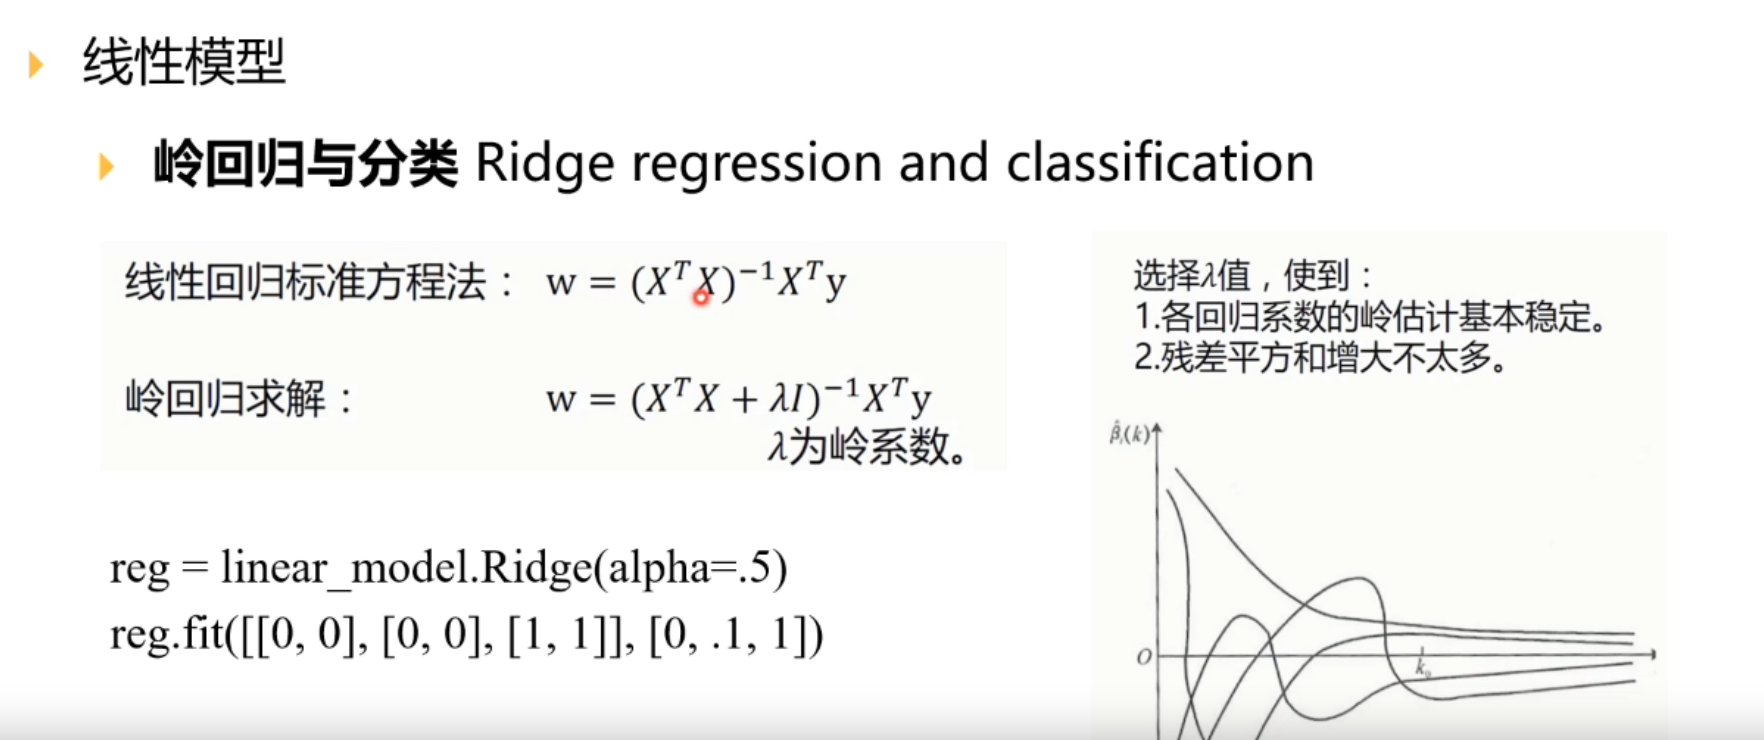

Coefficients: 
 [615.97080323] 153.07126354289545
Mean squared error: 3144.86
Coefficient of determination: 0.35


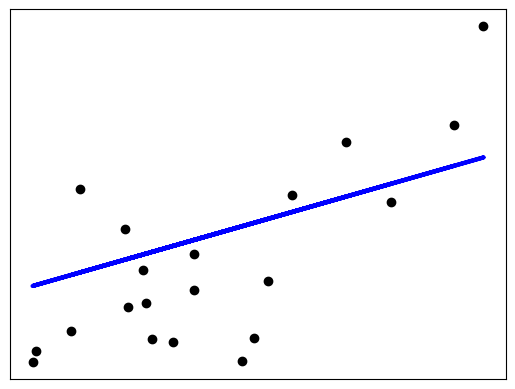

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.Ridge(alpha=0.5)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(diabetes_y_test, diabetes_y_pred))
        
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [152.89010239 615.99563778]
Mean squared error: 3137.32
Coefficient of determination: 0.35


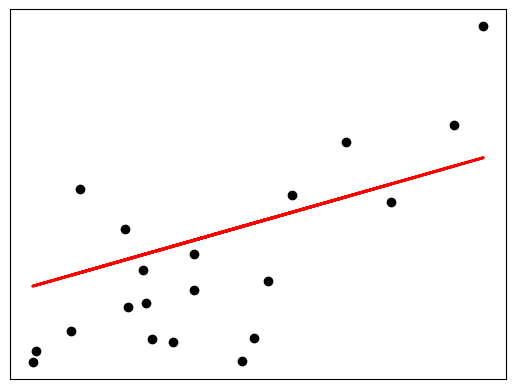

In [5]:
class RidgeRegression():
    def __init__(self, alpha=1.0):
        self.theta = None
        self.alpha = alpha

    def fit(self, X, y):
        n = len(X)
        X_b = np.hstack((np.ones((n, 1)), X))
        self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * np.eye(X_b.shape[1])).dot(X_b.T.dot(y))
        return self
    
    def predict(self, X):
        X_b = np.hstack((np.ones((len(X), 1)), X))
        return X_b.dot(self.theta)


# Create linear regression object
model = RidgeRegression(alpha=0.5)

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', model.theta)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(diabetes_y_test, diabetes_y_pred))
        
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()